In [52]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df = pd.read_csv('Titanic/train.csv')

In [178]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [179]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

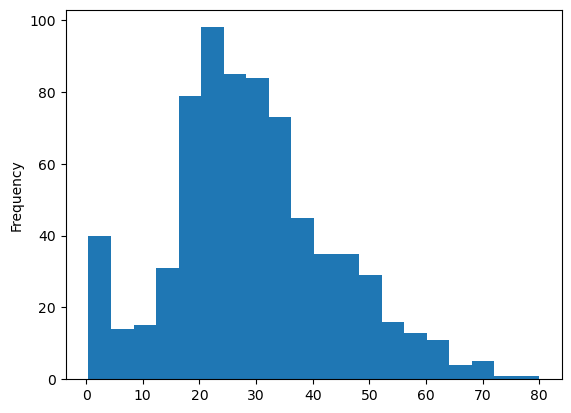

In [180]:
df['Age'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

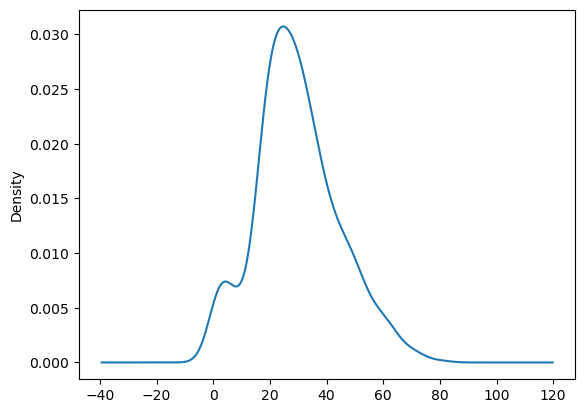

In [181]:
df['Age'].plot(kind='kde')

In [182]:
df['Age'].skew()

np.float64(0.38910778230082704)

<Axes: >

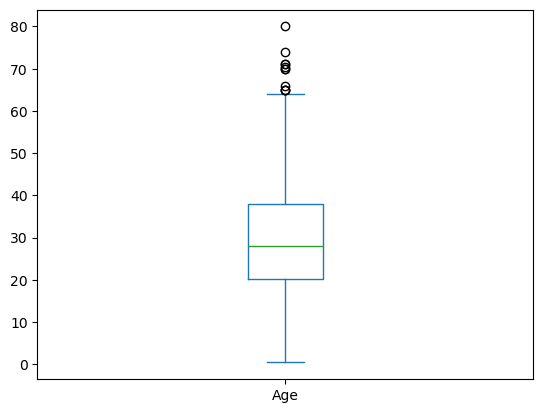

In [183]:
df['Age'].plot(kind='box')

In [184]:
df['Age'].isnull().sum() / len(df['Age'])

np.float64(0.19865319865319866)

#Age is almost normaly distributed
#20% of values are missing
#there are some outliers


In [185]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

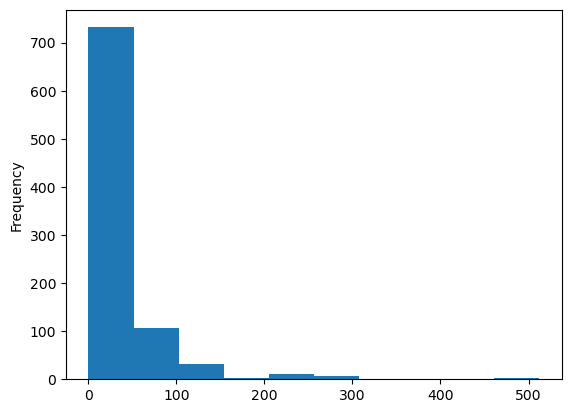

In [186]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

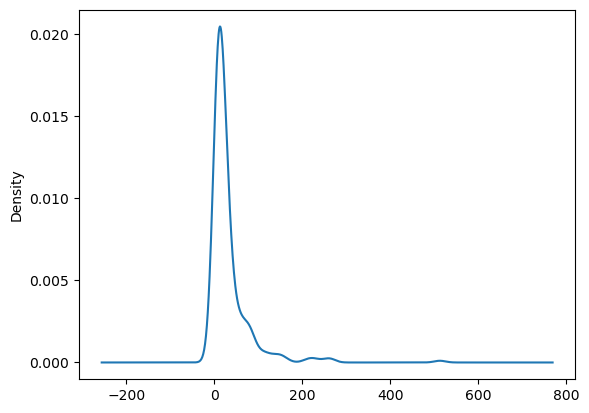

In [187]:
df['Fare'].plot(kind='kde')

<Axes: >

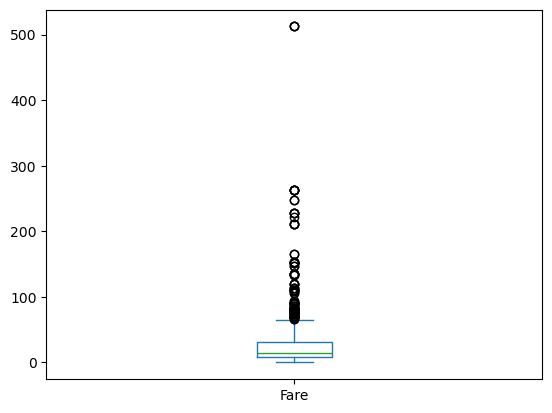

In [188]:
df['Fare'].plot(kind='box')

In [189]:
df[df['Fare'] > 250 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [190]:
df['Fare'].isnull().sum()

np.int64(0)

 Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [191]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

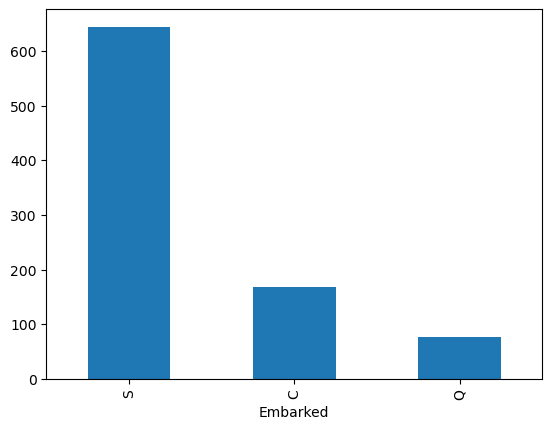

In [192]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

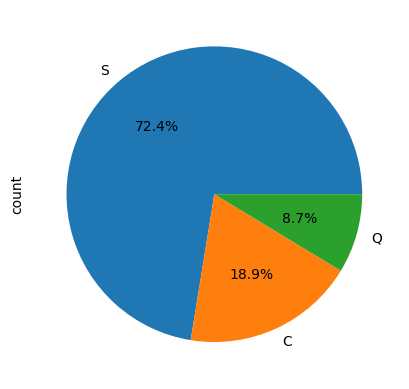

In [193]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [194]:
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

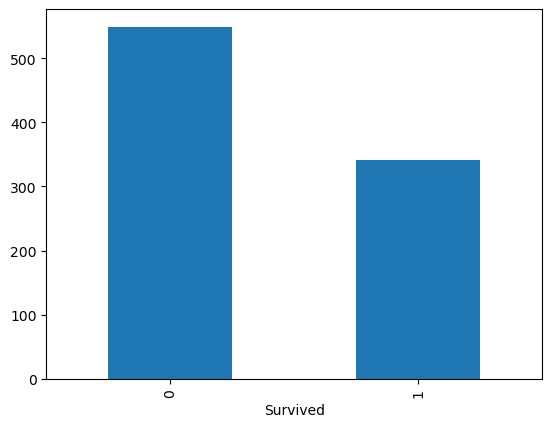

In [195]:
df['Survived'].value_counts().plot(kind='bar')

In [196]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: ylabel='count'>

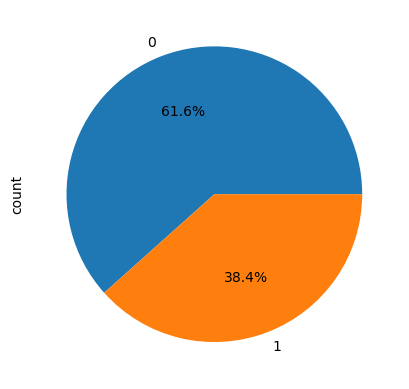

In [197]:
df['Survived'].value_counts().plot(kind='pie', autopct='%0.1f%%')

Steps of doing Bivariate Analysis

    Select 2 cols

    Understand type of relationship
        Numerical - Numerical
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots
        b. Check correlation coefficent to check linear relationship
        Numerical - Categorical - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots
        Categorical - Categorical
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.
        b. You can plots like heatmap, stacked barplots, treemaps

    Write your conclusions


In [198]:
pd.crosstab(df['Survived'],df['Pclass'], normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

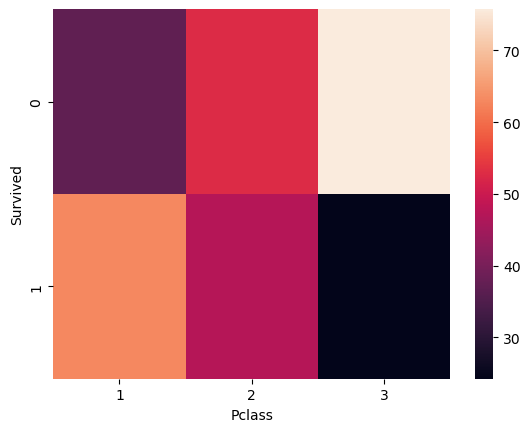

In [199]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'], normalize='columns')*100)

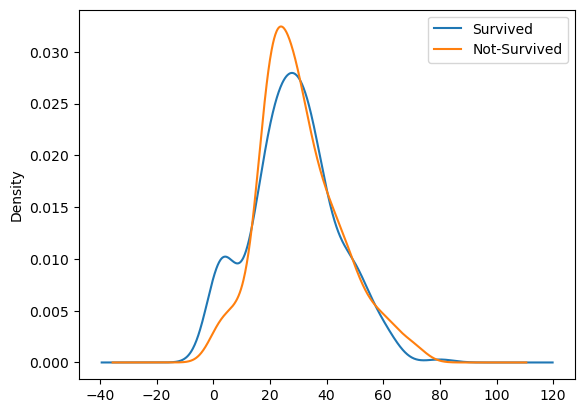

In [200]:
df[df['Survived'] == 1]['Age'].plot(kind='kde', label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde', label='Not-Survived')
plt.legend()


In [201]:
df[df['Survived'] == 1]['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [202]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [203]:
# Feature Engineering on Fare col

In [204]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [205]:
df[df['Ticket']== 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [206]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [207]:
df[df['Ticket'] == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [208]:
df['Individual Fare'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)

<Axes: >

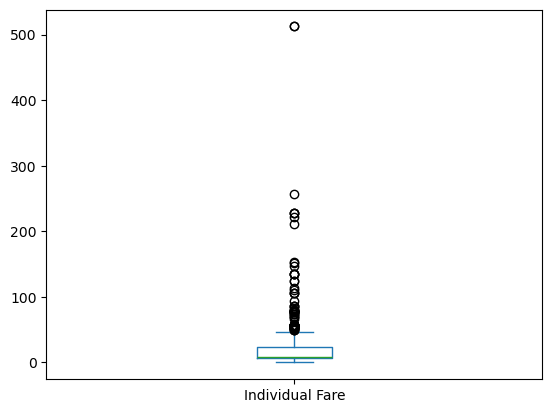

In [209]:
df['Individual Fare'].plot(kind='box')

In [210]:
df[['Individual Fare', 'Fare']].describe()

,Individual Fare,Fare
count,891.000000,891.000000
mean,19.916375,32.204208
std,35.841257,49.693429
min,0.000000,0.000000
25%,7.250000,7.910400
50%,8.300000,14.454200
75%,23.666667,31.000000
max,512.329200,512.329200


In [211]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,13.00000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,5.86250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30.00000


In [212]:
df['Family_size'] = df['SibSp'] + df['Parch'] + 1


In [213]:
def transform_family(num):
    if num == 1:
        return 'alone'
    elif num > 1 and num <5:
        return 'small'
    else:
        return 'large'

In [215]:
df['family_type'] = df['Family_size'].apply(transform_family)

In [217]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual Fare,Family_size,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,13.00000,1,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30.00000,1,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,5.86250,4,small
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30.00000,1,alone


In [219]:
pd.crosstab(df['Survived'], df['family_type'], normalize='columns')*100

family_type,alone,large,small
Survived,,,
0,69.646182,83.870968,42.123288
1,30.353818,16.129032,57.876712


In [221]:
df['surname'] = df['Name'].str.split(',').str.get(0)

In [223]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual Fare,Family_size,family_type,surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle


In [226]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip(' ').str.split().str.get(0)

In [228]:
temp_df = df[df['title'].isin(['Mr.','Miss.','Mrs.','Master.','ootherr'])]

In [230]:
pd.crosstab(temp_df['Survived'], temp_df['title'], normalize='columns')* 100

title,Master.,Miss.,Mr.,Mrs.
Survived,,,,
0,42.5,30.21978,84.332689,20.8
1,57.5,69.78022,15.667311,79.2


In [231]:
df['title'] = df['title'].str.replace('Rev.','other')
df['title'] = df['title'].str.replace('Dr.','other')
df['title'] = df['title'].str.replace('Col.','other')
df['title'] = df['title'].str.replace('Major.','other')
df['title'] = df['title'].str.replace('Capt.','other')
df['title'] = df['title'].str.replace('the','other')
df['title'] = df['title'].str.replace('Jonkheer.','other')
# ,'Dr.','Col.','Major.','Don.','Capt.','the','Jonkheer.']

In [233]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

np.float64(0.7710437710437711)

In [234]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [236]:
df['Cabin'].fillna('M')

0         M
1       C85
2         M
3      C123
4         M
       ... 
886       M
887     B42
888       M
889    C148
890       M
Name: Cabin, Length: 891, dtype: object

In [240]:
df['deck'] = df['Cabin'].str[0]

In [241]:
df['deck'].value_counts()

deck
M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [242]:
pd.crosstab(df['deck'], df['Pclass'])

Pclass,1,2,3
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4
M,40,168,479
T,1,0,0


<Axes: xlabel='deck'>

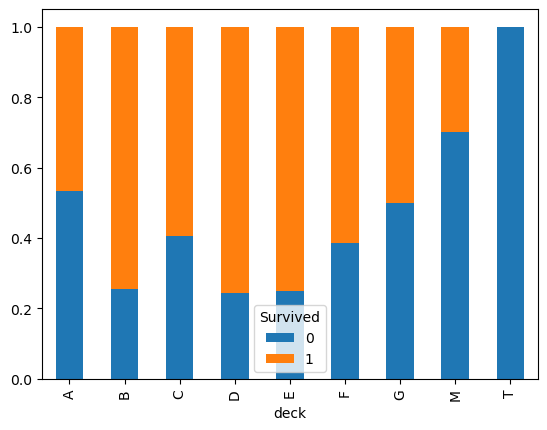

In [247]:
pd.crosstab(df['deck'],df['Survived'], normalize='index').plot(kind='bar', stacked=True)

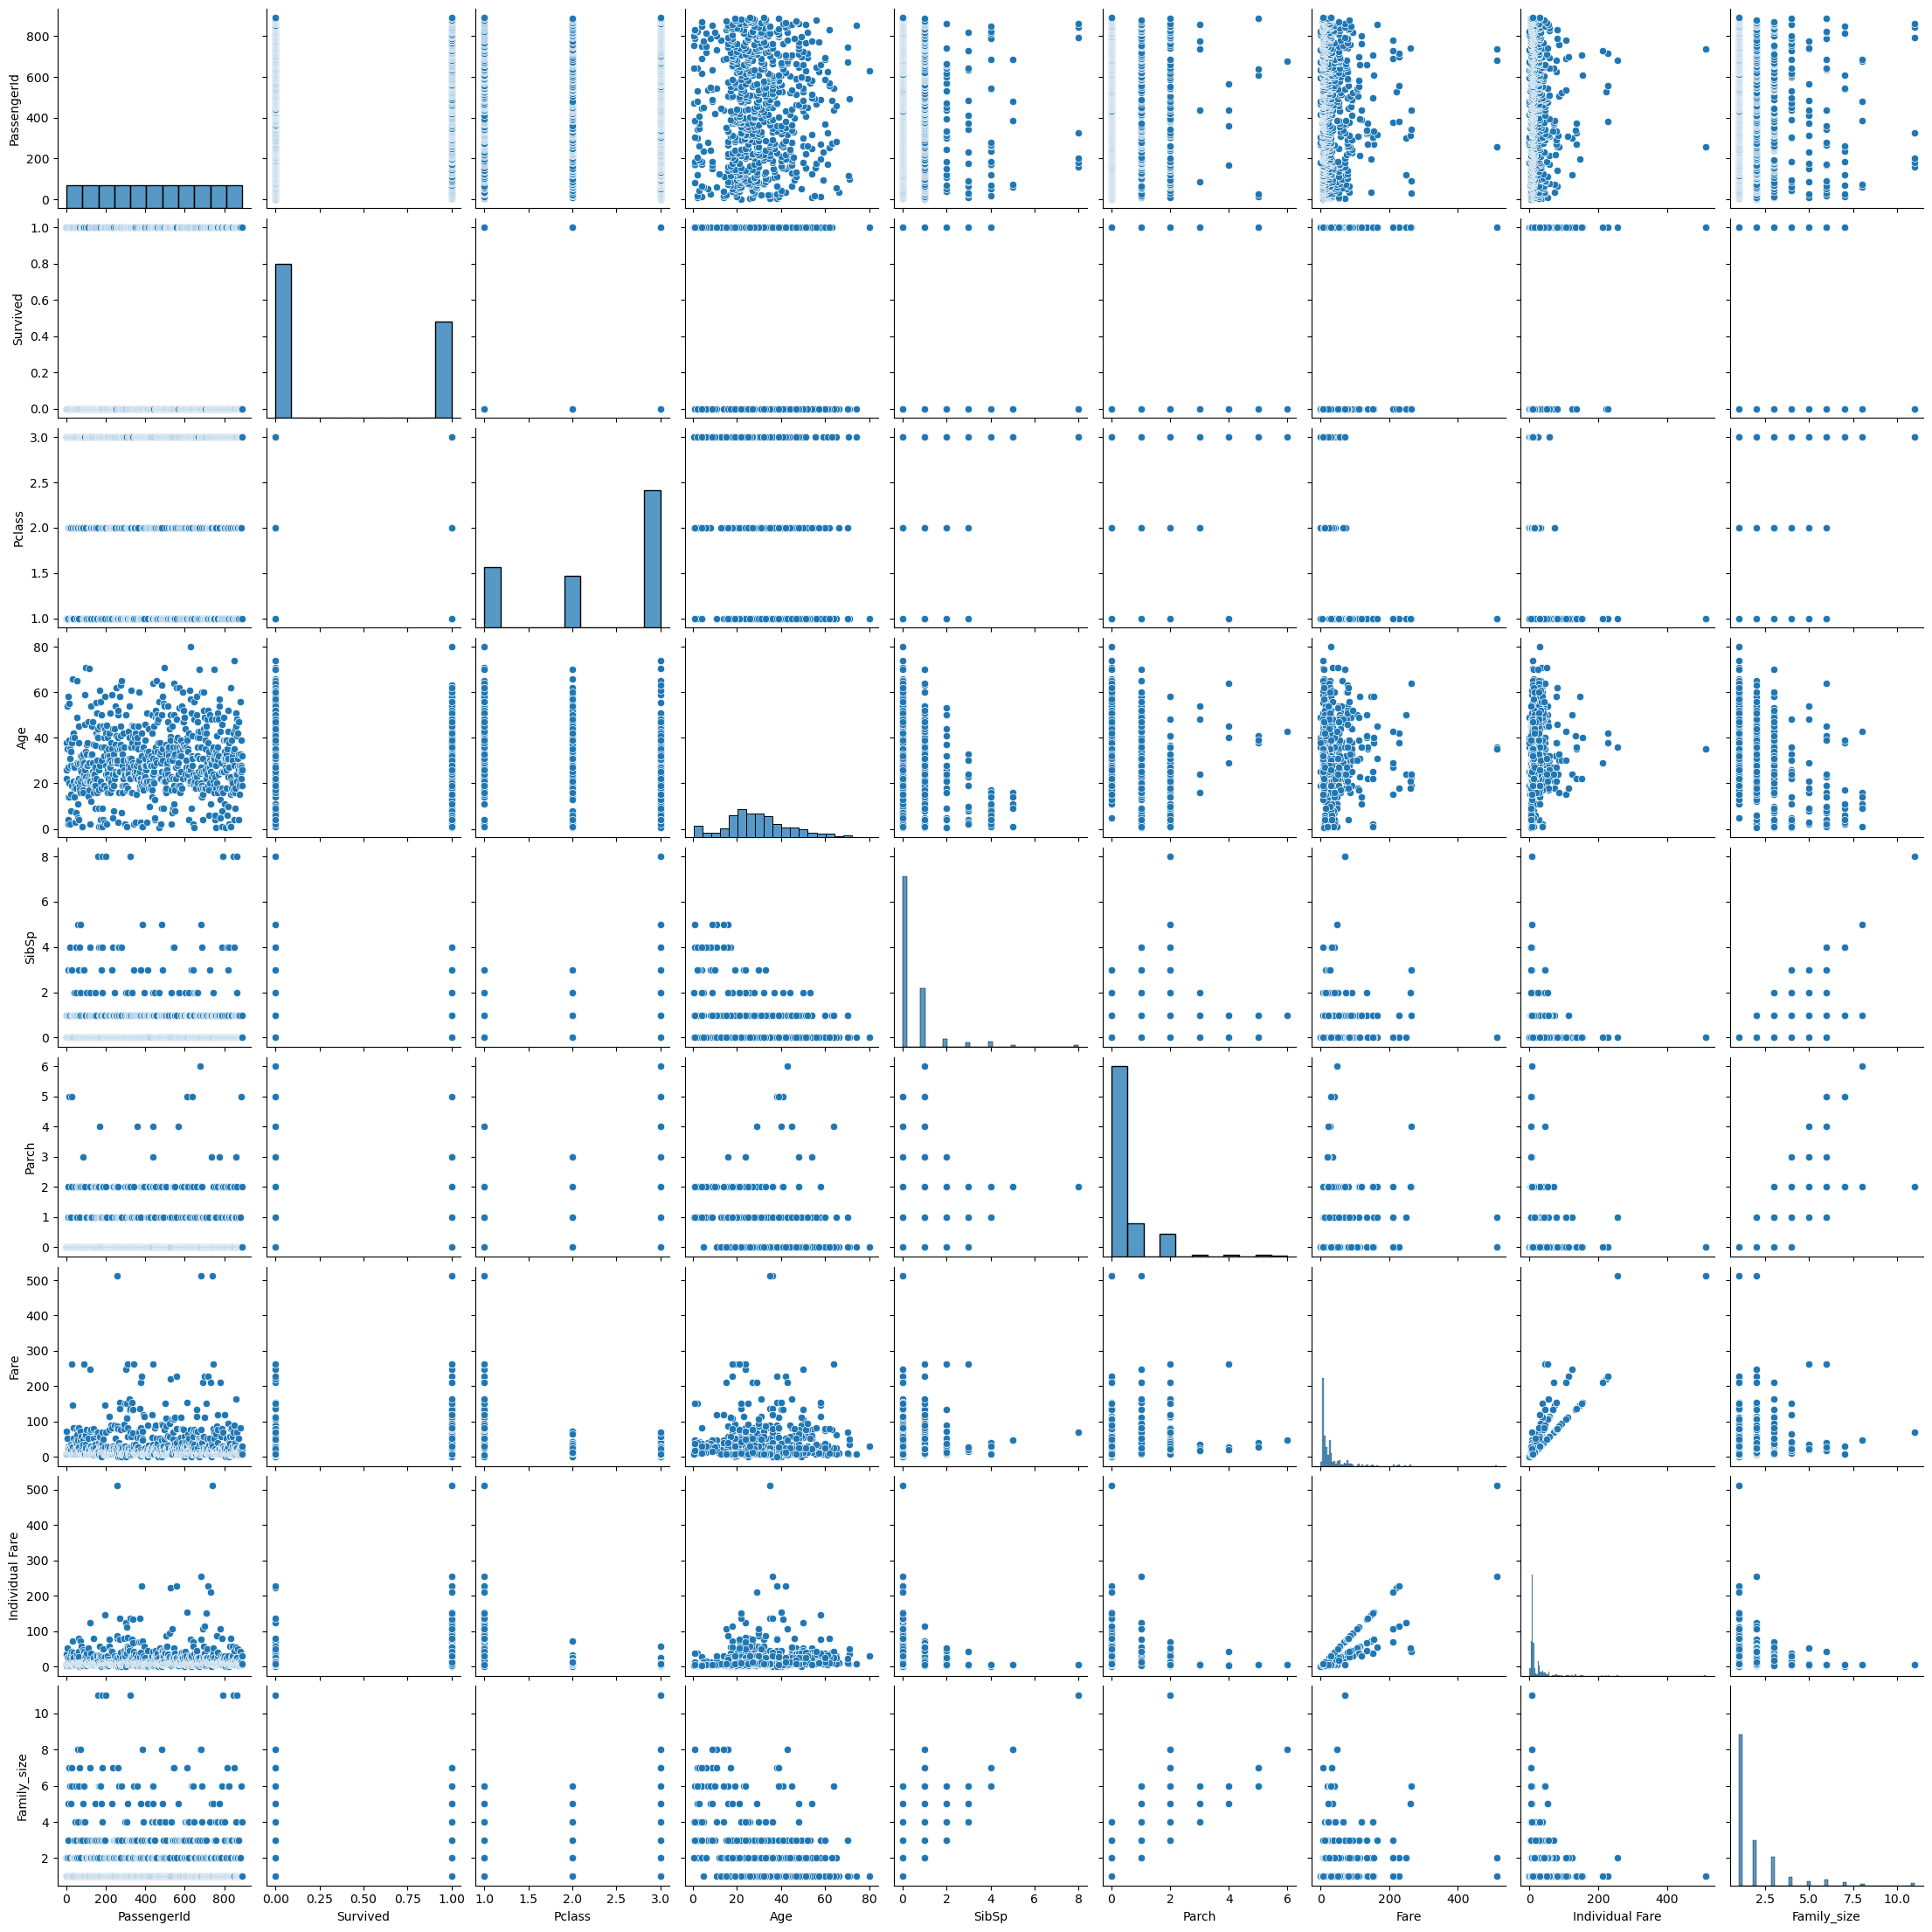

In [253]:
sns.pairplot(df)

In [256]:
df1 = pd.read_csv('Titanic/test.csv')

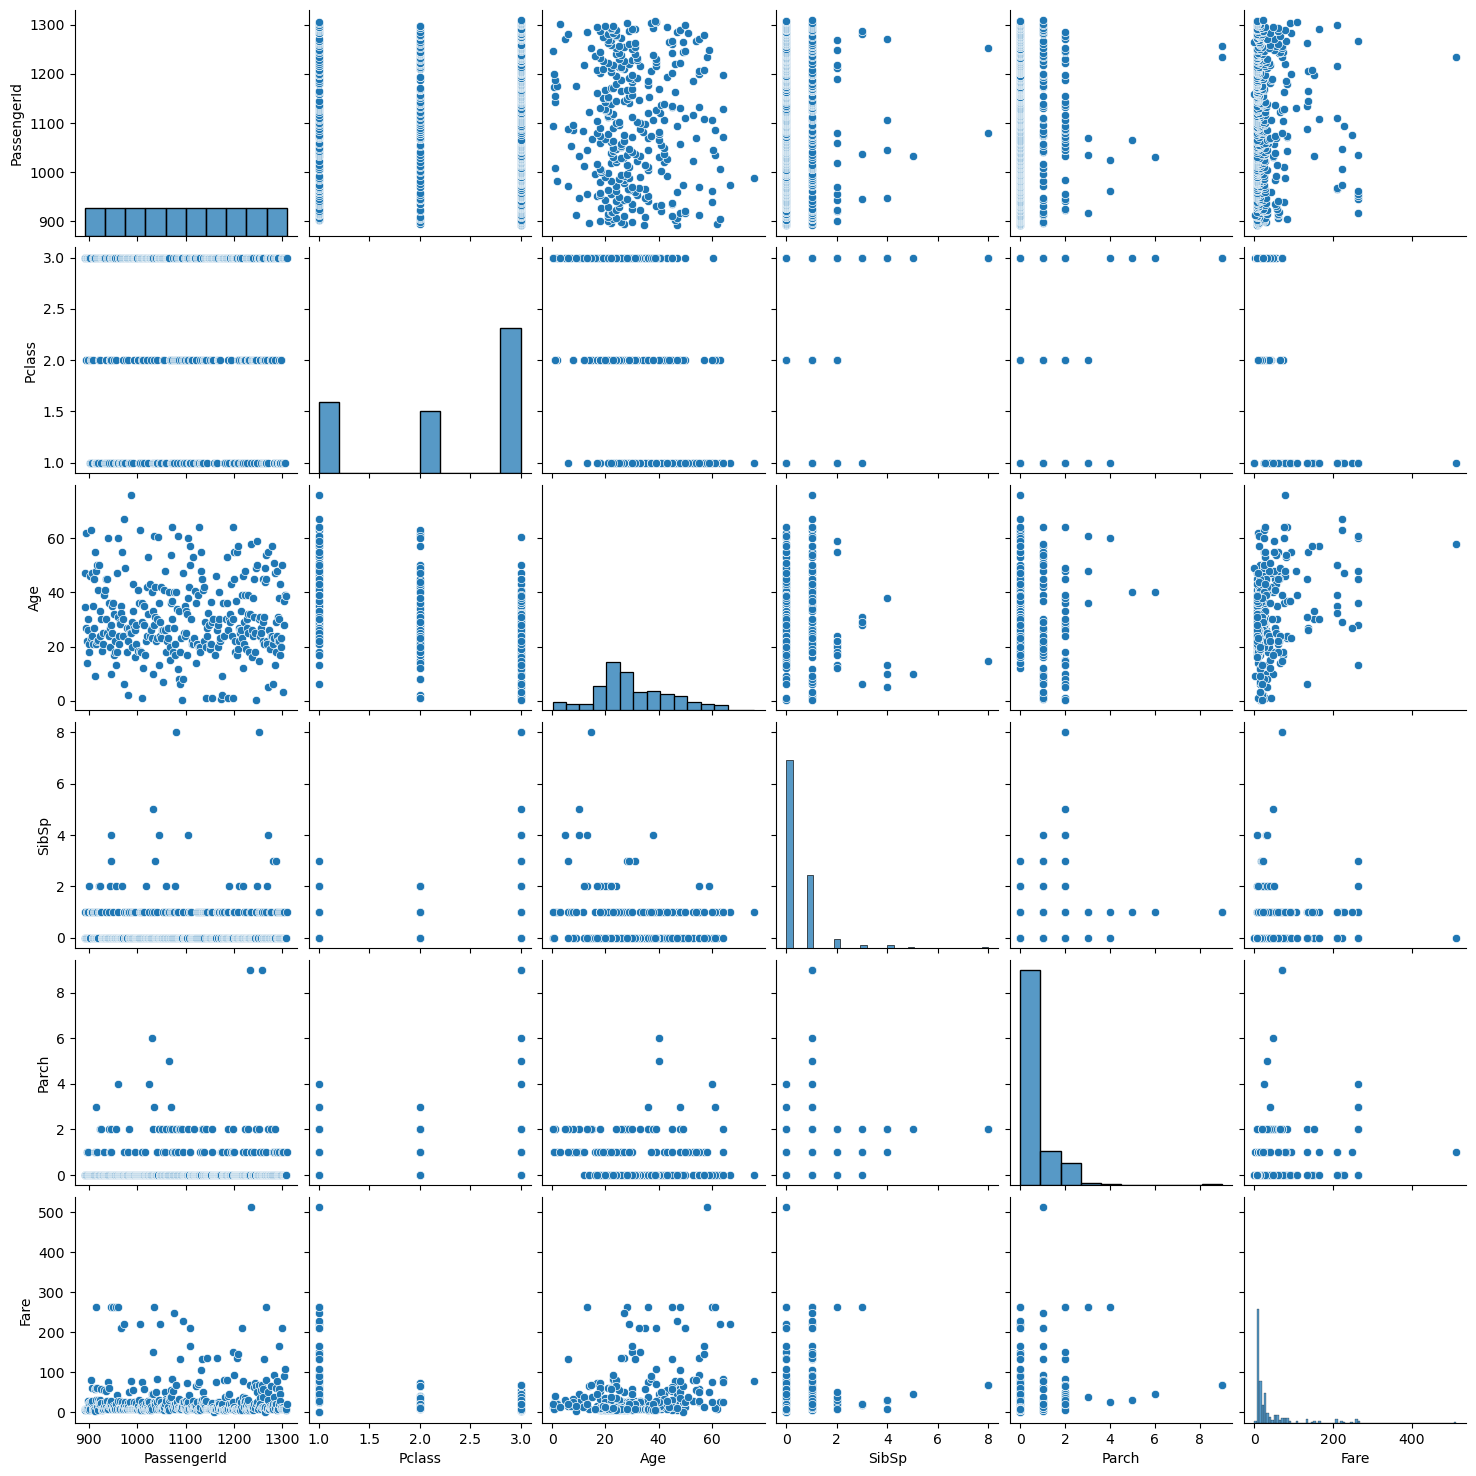

In [257]:
sns.pairplot(df1)

In [258]:
ls

'Car Price prediction'/               'ploting test.ipynb'   Untitled3.ipynb
 covariance_matrix.ipynb               salary_data.csv       Untitled4.ipynb
 DataSets/                             Statitistic.ipynb     Untitled5.ipynb
'DSA practice.ipynb'                   test.ipynb            Untitled6.ipynb
 file.csv                              Titanic/              Untitled7.ipynb
 homemade-machine-learning-master/     titanic.csv           Untitled8.ipynb
 Linear_Regression.ipynb               Titanic.ipynb         Untitled9.ipynb
'Lr - regulariz, cross valida.ipynb'   train.csv            'Untitled Folder'/
 lr_test.ipynb                         Untitled1.ipynb       Untitled.ipynb
 numpy.ipynb                           Untitled2.ipynb       workout.csv
